In [3]:
import datetime as dt

In [4]:
import yfinance as yf

In [5]:
import pandas as pd

In [30]:
import matplotlib

In [31]:
import matplotlib.pyplot as plt

In [8]:
tickers = ['AMZN', 'TSLA', 'NVDA', 'UNA']
close_prices = pd.DataFrame()

In [9]:
attempt = 0

In [10]:
drop = []

In [11]:
while len(tickers) != 0 and attempt <=5:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        try:
            temp = yf.download(tickers[i], dt.datetime.today() - dt.timedelta(3650), dt.datetime.today())
            temp.dropna(inplace=True)
            close_prices[tickers[i]] = temp['Adj Close']
            drop.append(tickers[i])
        except Exception as e:
            print(tickers[i], " :failed to fetch data", e)
    attempt += 1
            

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
close_prices.fillna(method='bfill', axis=0, inplace=True)

In [14]:
close_prices.dropna(axis=0, inplace=True)

In [15]:
close_prices.mean()

AMZN    454.497520
TSLA    157.112895
NVDA     42.381290
UNA      14.382347
dtype: float64

In [16]:
close_prices.median()

AMZN    324.570007
TSLA    191.169998
NVDA     17.781914
UNA       9.049000
dtype: float64

In [17]:
close_prices.std()

AMZN    302.885426
TSLA    110.408180
NVDA     54.567044
UNA      13.208237
dtype: float64

In [18]:
daily_returns = close_prices.pct_change()

In [19]:
daily_returns.mean()

AMZN    0.001553
TSLA    0.001885
NVDA    0.001963
UNA     0.006307
dtype: float64

In [20]:
daily_returns.median()

AMZN    0.001043
TSLA    0.000901
NVDA    0.001140
UNA     0.000000
dtype: float64

In [21]:
daily_returns.std()

AMZN    0.019433
TSLA    0.031856
NVDA    0.024583
UNA     0.170837
dtype: float64

In [22]:
daily_returns.rolling(window=20).mean()

,AMZN,TSLA,NVDA,UNA
Date,,,,
2010-06-29,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN
2010-07-06,NaN,NaN,NaN,NaN
...,...,...,...,...
2018-02-22,0.004777,0.000447,0.001973,-0.004467
2018-02-23,0.004517,0.002489,0.002637,-0.003759
2018-02-26,0.004374,0.002480,0.001292,-0.001860


In [23]:
daily_returns.ewm(span=20, min_periods=20).mean()

,AMZN,TSLA,NVDA,UNA
Date,,,,
2010-06-29,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN
2010-07-06,NaN,NaN,NaN,NaN
...,...,...,...,...
2018-02-22,0.005608,0.004207,0.003604,-0.003504
2018-02-23,0.006014,0.005424,0.004748,-0.002793
2018-02-26,0.006835,0.006361,0.004547,0.000476


In [24]:
daily_returns.ewm(span=20, min_periods=20).std()

,AMZN,TSLA,NVDA,UNA
Date,,,,
2010-06-29,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN
2010-07-06,NaN,NaN,NaN,NaN
...,...,...,...,...
2018-02-22,0.020278,0.027364,0.031874,0.010328
2018-02-23,0.019330,0.026311,0.030533,0.010078
2018-02-26,0.018569,0.025202,0.029050,0.014098


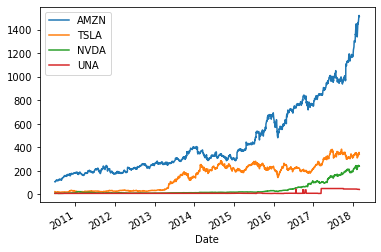

In [25]:
close_prices.plot()

In [81]:
# Results are super messy - standardise the prices for comparision using the z score

In [26]:
cp_standardised = (close_prices - close_prices.mean())/ close_prices.std()

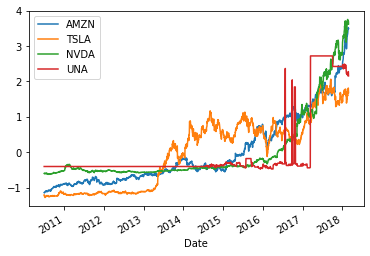

In [27]:
cp_standardised.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fbadc0210>,
      dtype=object)

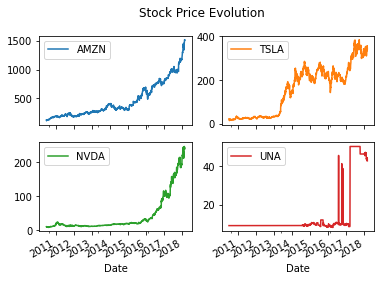

In [84]:
close_prices.plot(subplots=True, layout= (2,2), title='Stock Price Evolution')

In [ ]:
# Pyplot